In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Logistic Regression

Logistic Regression is an algorithm used for **binary classification**.

**Contents**:

- [Linear Regression](#1.-Linear-Regression)
- [Logistic Regression](#2.-Logistic-Regression)
- [Example: The Breast Cancer Dataset](#3.-Example:-The-Breast-Cancer-Dataset)
- [Polynomial Features](#4.-Polynomial-Features)

## 1. Linear Regression

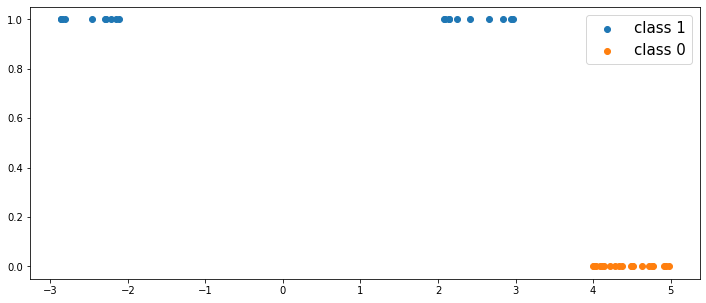

In [2]:
# toy example
x = np.zeros(40)
y = np.zeros(40)

x[0:10] = -3 + np.random.rand(10)
y[0:10] = 1

x[10:20] = 2 + np.random.rand(10)
y[10:20] = 1

x[20:40] = 4 + np.random.rand(20)
y[20:40] = 0

plt.figure(figsize=(12,5))
plt.scatter(x[0:20] ,y[0:20], label='class 1')
plt.scatter(x[20:40],y[20:40], label='class 0')
plt.legend(fontsize=15)

Let's fit a line $y=\theta_1x+\theta_0$ to the data, and use this line to classify the data points

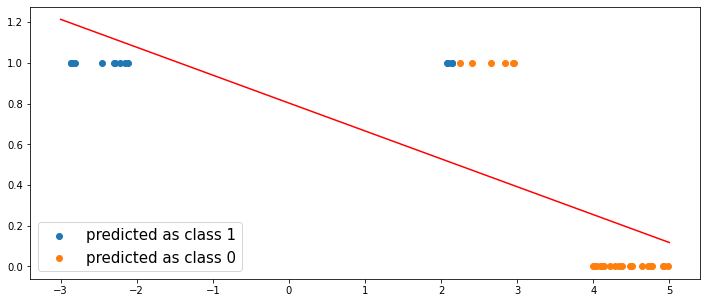

In [3]:
# matrix X
X = np.ones((40,2))
X[:,1] = x
# fit a line
theta = np.linalg.lstsq(X,y,rcond=None)[0]
# class prediction
y_pred = X.dot(theta)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<=0.5] = 0

# plot predictions
plt.figure(figsize=(12,5))
plt.scatter(x[y_pred==1],y[y_pred==1], label='predicted as class 1')
plt.scatter(x[y_pred==0],y[y_pred==0], label='predicted as class 0')

# plot linear regression model
x_plot = np.linspace(-3,5,100)
X_plot = np.ones((100,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

## 2. Logistic Regression

Logistic regression makes predictions using the formula:

$$
\mbox{prediction} \quad p = \sigma(x_1\theta_1+\theta_0) \quad \quad \mbox{where} \quad \quad 
\sigma(t) = \frac{1}{1+e^{-t}}
$$


The function $\sigma$ is called the **sigmoid function** (or logistic function)

In [4]:
'sigmoid function'
def sigmoid(t):
    return 1/(1+np.exp(-t))

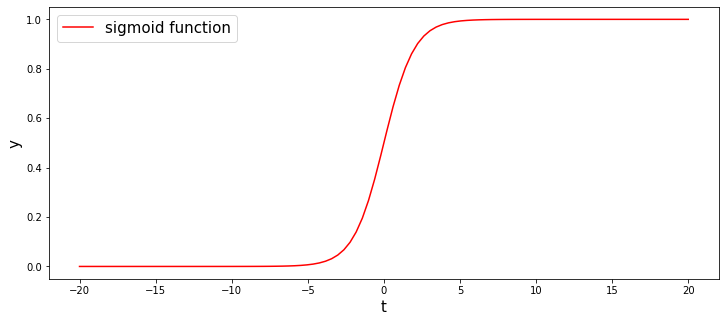

In [5]:
'plot sigmoid function'
x_sigmoid = np.linspace(-20,20,100)
y_sigmoid = sigmoid(x_sigmoid)
plt.figure(figsize=(12,5))
plt.plot(x_sigmoid,y_sigmoid,'r-', label='sigmoid function')
plt.xlabel('t',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend(fontsize=15)

We can transform the prediction $\widehat{y}$ to binary outcome using the rule

$$
\widehat{y} = \left\{\begin{array}{lr}
0 & \mbox { if }\quad p<0.5\\
1 & \mbox{ if }\quad p\geq 0.5
\end{array}\right.
$$

The logistic regression model is fitted using the **cost function**:

$$
E(\theta) = -\sum_{i=1}^m\left[ y_i \log(p_i)+(1-y_i)\log(1-p_i) \right]
$$

In [6]:
'logistic regression cost function'
def logregression_cost(y,X,theta):
    m = len(y)
    p = sigmoid(X.dot(theta))
    return -(np.sum(y*np.log(p) + (1-y)*np.log(1-p)))

The **gradient** of the logistic regression model is given by

$$
\nabla E(\theta) = X^T(\sigma(X\theta)-y)
$$

We can fit a logistic regression model using **Gradient Descent**

In [7]:
'Logistic regression with Gradient Descent'
def logregression_GD(X,y,learning_rate, n_epochs=100):
    
    m,n = X.shape
    theta = np.random.randn(n)
    
    # initialize cost vector 
    cost = np.zeros(n_epochs)
    
    # gradient descent steps
    for epoch in range(n_epochs):
        gradient = X.T.dot(sigmoid(X.dot(theta))-y) # compute gradient
        theta = theta - learning_rate*gradient # Gradient Descent Step
        cost[epoch] = logregression_cost(y,X,theta) # compute the cost function
            
    results = {}
    results['theta'] = theta
    results['cost'] = cost
    return results

In [8]:
# gradient descent
results = logregression_GD(X,y, 
                           learning_rate=.01,
                           n_epochs = 500,
                          )

Text(0, 0.5, 'cost')

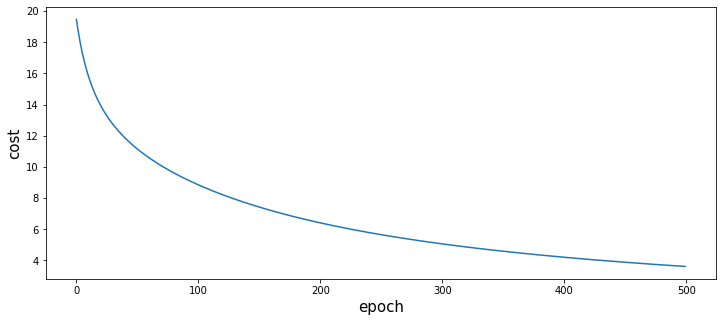

In [9]:
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

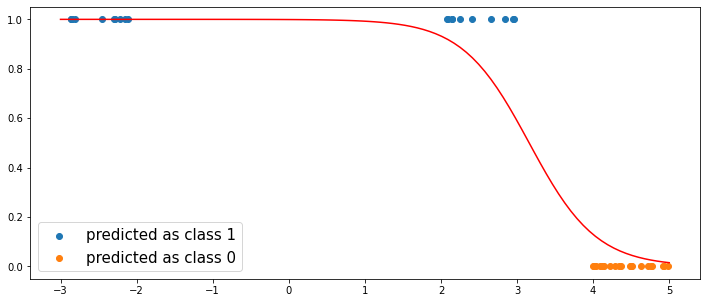

In [10]:
# plot results
plt.figure(figsize=(12,5))

# class predictions
theta = results['theta']
p = sigmoid(X.dot(theta))
p[p>0.5]=1
p[p<=0.5]=0

# plot data points
plt.scatter(x[p==1],y[p==1], label='predicted as class 1')
plt.scatter(x[p==0],y[p==0], label='predicted as class 0')

# plot logistic regression model
y_plot = sigmoid(X_plot.dot(theta))
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

## 4. Polynomial Features

In [11]:
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1 features)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly

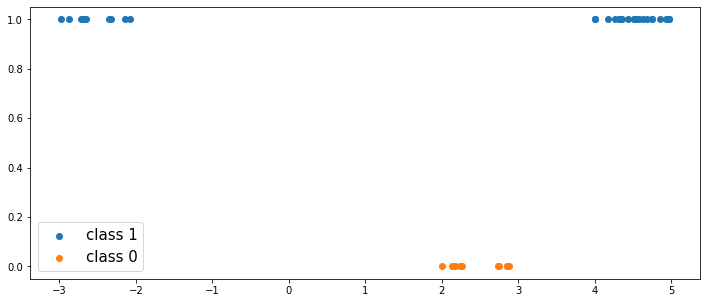

In [12]:
# toy example
x = np.zeros(40)
y = np.zeros(40)

x[0:10] = -3 + np.random.rand(10)
y[0:10] = 1

x[10:20] = 2 + np.random.rand(10)
y[10:20] = 0

x[20:40] = 4 + np.random.rand(20)
y[20:40] = 1

plt.figure(figsize=(12,5))
plt.scatter(x[y==1] ,y[y==1], label='class 1')
plt.scatter(x[y==0],y[y==0], label='class 0')
plt.legend(fontsize=15)

In [13]:
# matrix X
X = build_poly_features(x,degree=1)

In [14]:
# gradient descent
results = logregression_GD(X,y, 
                           learning_rate=0.01,
                           n_epochs = 500
                          )

Text(0, 0.5, 'cost')

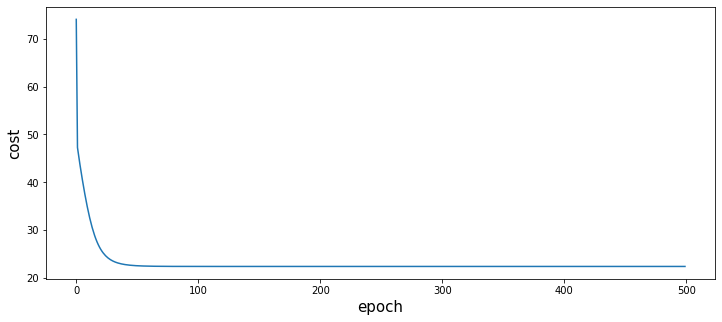

In [15]:
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

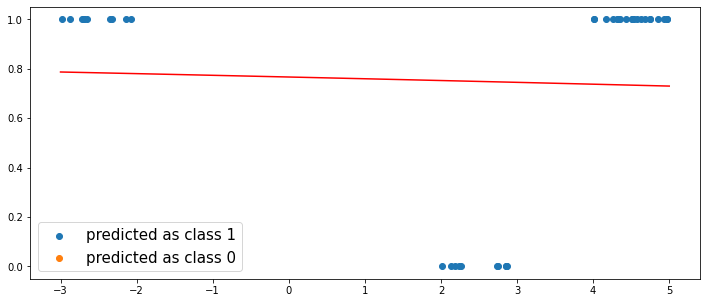

In [16]:
# plot results
plt.figure(figsize=(12,5))

theta = results['theta']
# predictions
p = sigmoid(X.dot(theta))
# class prediction
p[p>0.5]=1
p[p<=0.5]=0

# plot data points
plt.scatter(x[p==1],y[p==1], label='predicted as class 1')
plt.scatter(x[p==0],y[p==0], label='predicted as class 0')

# plot logistic regression model
theta = results['theta']
y_plot = sigmoid(X_plot.dot(theta))
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

In [17]:
# adding polynomial features (degree = 2)
X = build_poly_features(x,degree=2)

In [18]:
# gradient descent
results = logregression_GD(X,y, 
                           learning_rate=0.001,
                           n_epochs = 500,
                          )

Text(0, 0.5, 'cost')

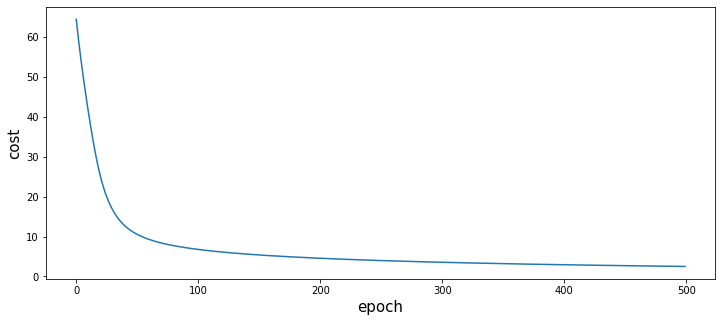

In [19]:
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

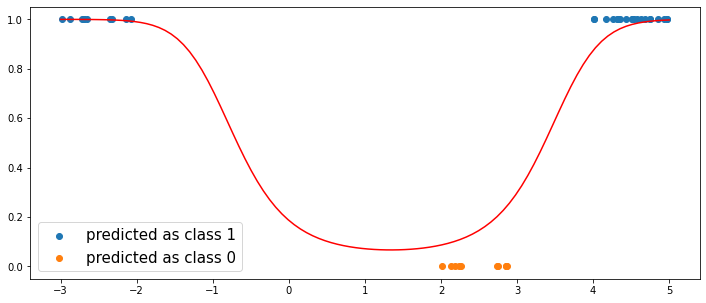

In [20]:
# plot results
plt.figure(figsize=(12,5))

theta = results['theta']
# predictions
p = sigmoid(X.dot(theta))
# class prediction
p[p>0.5]=1
p[p<=0.5]=0

# plot data points
plt.scatter(x[p==1],y[p==1], label='predicted as class 1')
plt.scatter(x[p==0],y[p==0], label='predicted as class 0')

# plot logistic regression model
X_plot = build_poly_features(x_plot,degree=2)

y_plot = sigmoid(X_plot.dot(theta))
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

## Visualizing the classification regions

A logistic regression model will split the feature space into regions called classification regions. All points in a classification region are assigned to the same class.

In [40]:
def plot_logregression_regions(X, y, theta, degree=0):
    from matplotlib.colors import ListedColormap
    # create a 100x100 meshgrid
    m_plot = 100
    x1 = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, m_plot)
    x2 = np.linspace(X[:,1].min()-0.5,X[:,1].max()+0.5, m_plot)
    X1, X2 = np.meshgrid(x1, x2) 
    X_plot = np.c_[X1.ravel(), X2.ravel()]
    
    X_plot_poly = build_poly_features(X_plot,degree=degree)

    # evaluate the logistic regression model at each point of the mesh grid    
    y_plot = sigmoid(X_plot_poly.dot(theta))
        
    # class prediction    
    y_plot[y_plot>=0.5]=1
    y_plot[y_plot<0.5]=0
    y_plot = y_plot.reshape(X1.shape)

    custom_cmap = ListedColormap(['C0','C1'])
    # contour map
    plt.figure(figsize=(12,5))
    plt.contourf(X1, X2, y_plot, alpha=0.3, cmap=custom_cmap)
    
    
    plt.plot(X[y==0,0],X[y==0,1],'o',label = 'class '+str(0))
    plt.plot(X[y==1,0],X[y==1,1],'o',label = 'class '+str(1))
    plt.legend(fontsize=15)

### example 1: two moons dataset

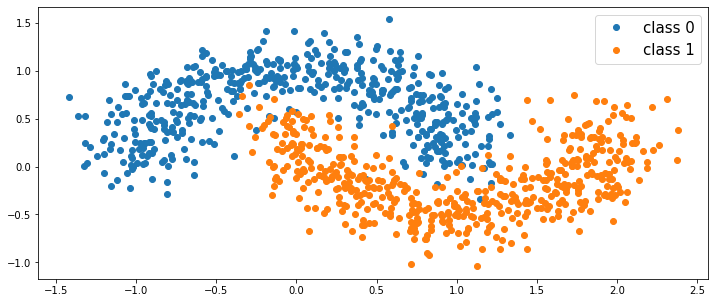

In [41]:
# run this cell to generate and visualize the dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.2)

plt.figure(figsize=(12,5))
plt.plot(X[y==0,0],X[y==0,1],'o',label = 'class '+str(0))
plt.plot(X[y==1,0],X[y==1,1],'o',label = 'class '+str(1))
plt.legend(fontsize=15)

In [42]:
X_poly = build_poly_features(X,degree=1)

Text(0, 0.5, 'cost')

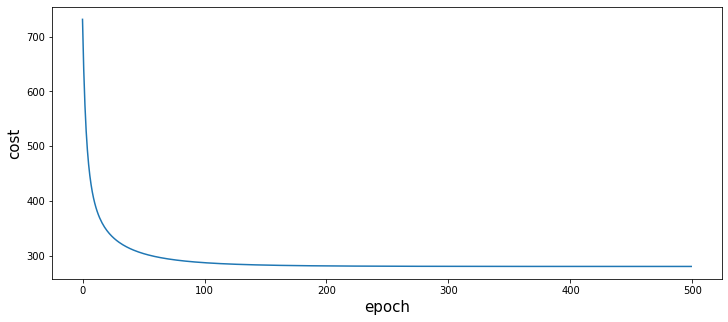

In [43]:
# gradient descent
results = logregression_GD(X_poly,y, 
                           learning_rate=0.001,
                           n_epochs = 500,
                          )
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

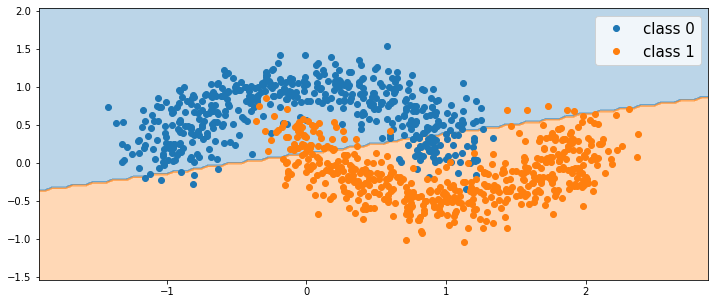

In [44]:
theta = results['theta']
plot_logregression_regions(X, y, theta, degree=1)

Notice that the boundary between regions is linear.

In [45]:
X_poly = build_poly_features(X,degree=3)

Text(0, 0.5, 'cost')

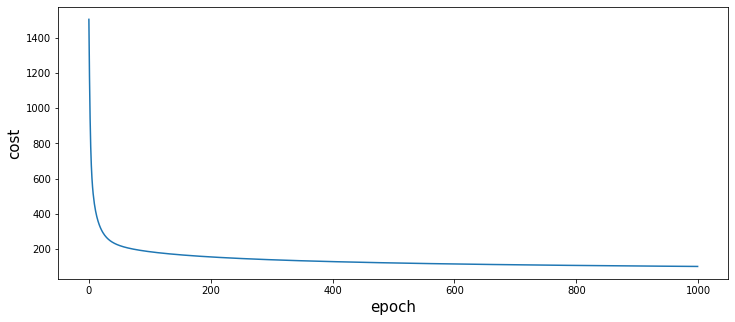

In [47]:
# gradient descent
results = logregression_GD(X_poly,y, 
                           learning_rate=0.001,
                           n_epochs = 1000,
                          )
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

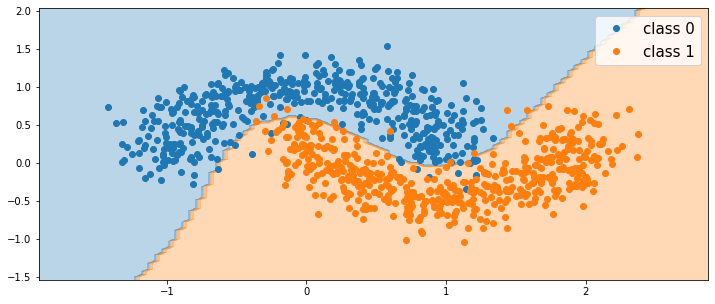

In [50]:
theta = results['theta']
plot_logregression_regions(X, y, theta, degree=3)

### example 2: two circles dataset

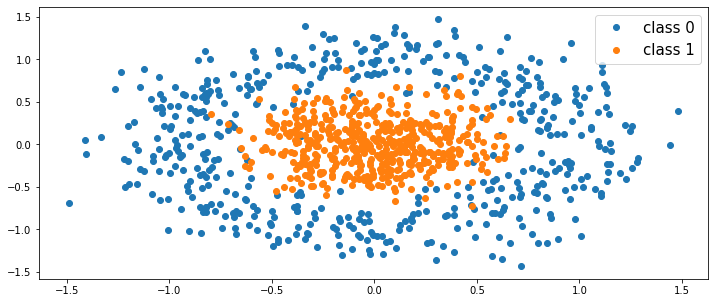

In [55]:
# run this cell to generate and visualize the dataset
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000,noise=0.2,factor=0.3)

plt.figure(figsize=(12,5))
plt.plot(X[y==0,0],X[y==0,1],'o',label = 'class '+str(0))
plt.plot(X[y==1,0],X[y==1,1],'o',label = 'class '+str(1))
plt.legend(fontsize=15)

In [56]:
X_poly = build_poly_features(X,degree=1)

Text(0, 0.5, 'cost')

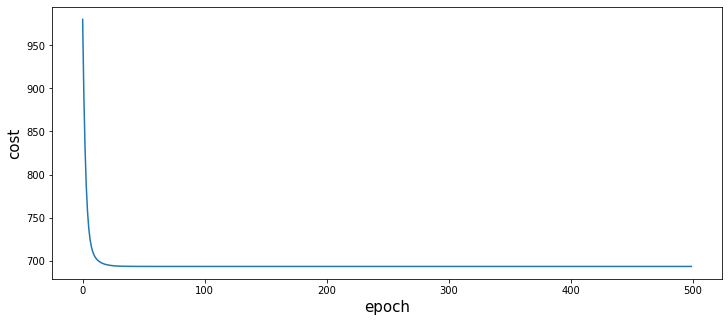

In [57]:
# gradient descent
results = logregression_GD(X_poly,y, 
                           learning_rate=0.001,
                           n_epochs = 500,
                          )
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

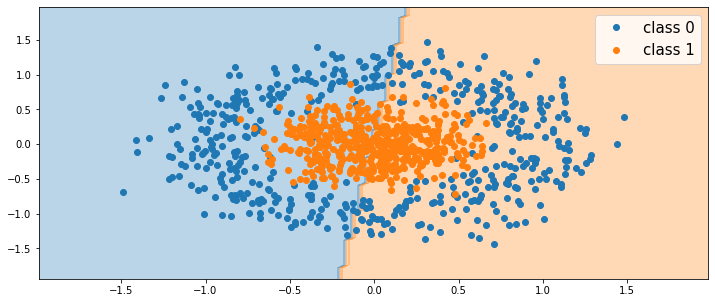

In [58]:
theta = results['theta']
plot_logregression_regions(X, y, theta, degree=1)

In [59]:
X_poly = build_poly_features(X,degree=3)

Text(0, 0.5, 'cost')

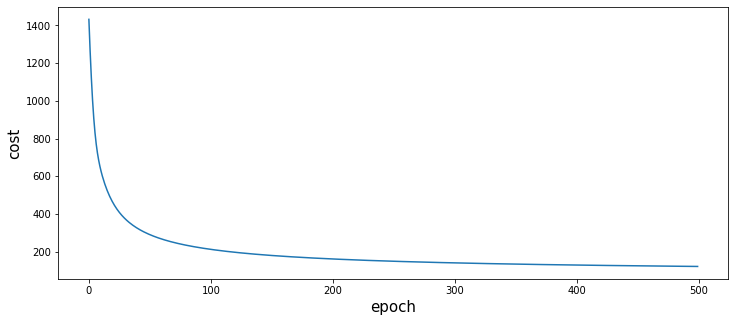

In [60]:
# gradient descent
results = logregression_GD(X_poly,y, 
                           learning_rate=0.001,
                           n_epochs = 500,
                          )
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

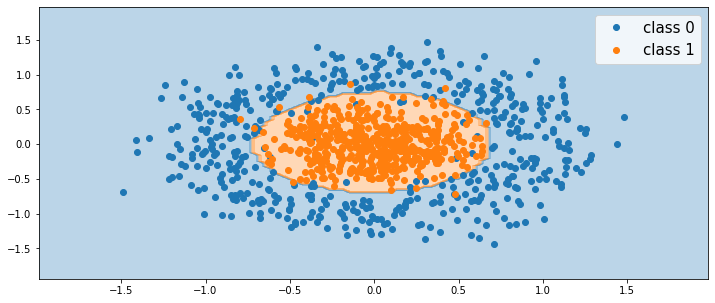

In [62]:
theta = results['theta']
plot_logregression_regions(X, y, theta, degree=3)

### example 3: two spirals dataset

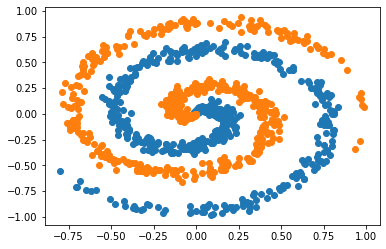

In [74]:
# spirals dataset
classes = 2
n_points = 500
noise = 0.35
radius = 10

X = np.zeros((n_points*classes, 2))
y = np.zeros(n_points*classes).astype('int')

for class_number in range(classes):
    ix = range(n_points*class_number, n_points*(class_number+1))
    r = np.linspace(0,1, n_points)
    t = np.linspace(class_number*radius, (class_number+1)*radius, n_points) + np.random.randn(n_points)*noise
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = class_number
    
plt.plot(X[y==0,0],X[y==0,1],'o',label = 'class '+str(0))
plt.plot(X[y==1,0],X[y==1,1],'o',label = 'class '+str(1))

In [98]:
X_poly = build_poly_features(X,degree=10)

Text(0, 0.5, 'cost')

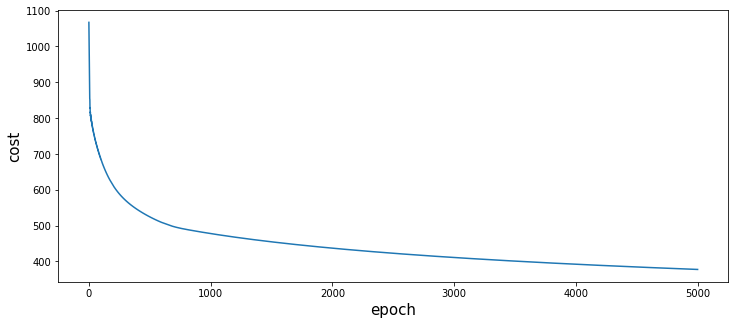

In [104]:
# gradient descent
results = logregression_GD(X_poly,y, 
                           learning_rate=0.01,
                           n_epochs = 5000,
                          )
cost = results['cost']
plt.figure(figsize=(12,5))
plt.plot(cost)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('cost', fontsize=15)

<ipython-input-4-dbba508fb2e1>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))


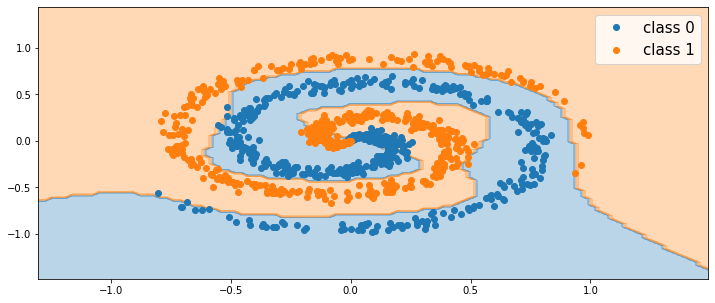

In [105]:
theta = results['theta']
plot_logregression_regions(X, y, theta, degree=10)

## 3.  The Breast Cancer Dataset

In [26]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/cancer.csv'
data = pd.read_csv(url)
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [27]:
data.shape

(569, 12)

**Attribute information**

| Label | Description |
| :- | -: |
| id | ID number |
| diagnosis |  M = malignant, B = benign |

Ten real-valued features are computed for each cell nucleus. 
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
They describe characteristics of the cell nuclei present in the image. 
A few of the images can be found at [Web Link](http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html).

| Label | Description |
| :- | -: |
| radius  |mean of distances from center to points on the perimeter |
| texture | standard deviation of gray-scale values |
| perimeter |
| area |
| smoothness | local variation in radius lengths |
| compactness | perimeter^2 / area - 1.0 |
| concavity | severity of concave portions of the contour |
| concave points | number of concave portions of the contour |
| symmetry |
| fractal dimension | coastline approximation - 1 |

In [28]:
diagnosis = data['diagnosis'].to_numpy() 
X = data.iloc[:,2:12].to_numpy()

In [29]:
# optional: scale X (Gradient Descent works better if we scale the matrix X)
X = X/np.max(X,axis=0)

In [30]:
# optional: add bias and/or polynomial features
X_poly = build_poly_features(X,degree=1)

In [31]:
# map classes to {0,1}: M (malignant)->1, B (benign)->0
y = np.zeros(len(diagnosis))
y[diagnosis=='M']=1
y[diagnosis=='B']=0

In [32]:
# gradient descent
results = logregression_GD(X_poly,y, 
                           learning_rate=.01,
                           n_epochs = 2000)

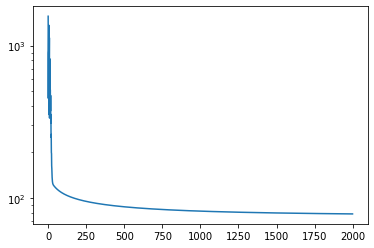

In [33]:
cost = results['cost']
plt.semilogy(cost)

In [34]:
# predictions
theta = results['theta']
p = sigmoid(X_poly.dot(theta))
# class predictions
y_pred = np.zeros(len(y))
y_pred[p>=0.5] = 1
y_pred[p<0] = 0

In [35]:
# percentage of correct classifications
100*np.sum(y==y_pred)/len(y)

94.37609841827768

In [36]:
# percentage of incorrect classification
100*np.sum(y!=y_pred)/len(y)

5.62390158172232

In [37]:
# confusion matrix
n_classes = 2
C = np.zeros((2,2))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = np.sum(y[y_pred==i]==j)
C

array([[346.,  21.],
       [ 11., 191.]])